# Michael Lockhart - Privacy Task Sheet

Here I submit my code and notes for the privacy scientist role.

## Part 1

In [13]:
# Imports of modules for all sections of task 1
import pandas as pd
import numpy as np
from numpy import random # provided a better distribution than random randint and all possibilities were populated
import matplotlib.pyplot as plt
import seaborn as sns

## A) 
Randomly generate a dataset (dataframe) with eight columns and 50,000 rows. Each column should be a categorical variable (of arbitrary name) with three levels (of arbitrary names) in approximately equal proportions

In [2]:
# A function that simplifies the creation of a list of randomly assigned catagorical variables
def catagorical_maker(column, catagoricals, number_of_rows): 
    '''
    Returns a list of random catagoricals chosen from a 
    Inputs of a column name, list of names and total number required rows.
    
    catagorical_marker(column header string, catagorical value list, integer)
    
    '''
    number_of_catagoricals = (len(catagoricals) - 1) # length of catagoricals minus one, due to indexing
    random_catagoricals_list = []
    for f in range(number_of_rows): # iterate over the total number of rows to generate a list of catagoricals
        random_value = random.randint(0,number_of_catagoricals)
        random_catagoricals_list.append(catagoricals[random_value])
    return random_catagoricals_list

In [3]:
# A predefined dictionary of status that may be found in health data
status_catagoricals = {
                       'Status': ['Single', 'Married', 'Divorced'],
                       'Piggies': ['Big', 'Bad', 'Wolf'],
                       'Likes': ['I', 'Like', 'Cheese'],
                       'Book': ['Lion', 'Witch', 'Wardrobe'],
                       'CryoEM': ['Grid', 'Square', 'Holes'],
                       'Christmas': ['Turkey', 'Goose', 'Duck'],
                       'Toys': ['Barbie', 'Ken', 'Actionman'],
                       'Z': ['X', 'Y', 'Z']
                      }

# Iterating through the dictionary to generate a list of lists that can be converted to a Pandas data frame
random_lists = []
column_name = []
for x, f in enumerate(status_catagoricals): # enumberating to obtain the column name for a column name list
    value = catagorical_maker(f, status_catagoricals[f], 50000) # calling the function to generate the list for each key
    random_lists.append(value)
    column_name.append(f)

# Generating the data frame using the random list and column names corresponding to the list
# The lists required transforming to a NumPy array in order to transpose to an 8 x 50000 data frame
transposed_list = np.array(random_lists).T
df = pd.DataFrame(transposed_list, columns = column_name)

In [4]:
df.head()

,Status,Piggies,Likes,Book,CryoEM,Christmas,Toys,Z
0,Single,Bad,Like,Lion,Square,Turkey,Barbie,X
1,Single,Big,Like,Lion,Grid,Goose,Ken,Y
2,Single,Big,Like,Witch,Grid,Goose,Ken,Y
3,Married,Bad,I,Lion,Grid,Turkey,Barbie,X
4,Married,Big,I,Witch,Grid,Goose,Barbie,Y


In [5]:
# Here the frequency of each row is calculated
temp1 = df.groupby(column_name).size() # Calculates the frequency of all column possibilities
temp2 = temp1.reset_index() # Resents the index to make to a single level
frequency_df = temp2.rename(columns={0:'Frequency'}) # Provides the column name 'Frequency'
# Could also have been combined to "frequency_df = df.groupby(column_name).size().reset_index().rename(columns={0:'count'})"
frequency_df.head()

,Status,Piggies,Likes,Book,CryoEM,Christmas,Toys,Z,Frequency
0,Married,Bad,I,Lion,Grid,Goose,Barbie,X,182
1,Married,Bad,I,Lion,Grid,Goose,Barbie,Y,190
2,Married,Bad,I,Lion,Grid,Goose,Ken,X,184
3,Married,Bad,I,Lion,Grid,Goose,Ken,Y,203
4,Married,Bad,I,Lion,Grid,Turkey,Barbie,X,169


Text(0.5, 0, 'Commbination Occurance')

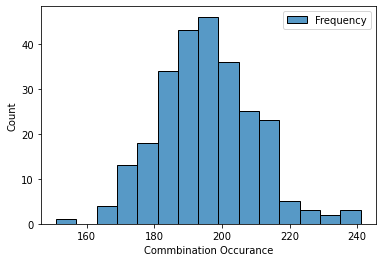

In [6]:
#print(len(frequency_df_main))
#for f in range(len(frequency_df_main)):
#    if (frequenct_df_main['count'].iloc[f]) == 0:
#        print(frequenct_df_main.iloc[f])
frequency_plot = sns.histplot(data=frequency_df, bins=15)
frequency_plot.set_xlabel("Commbination Occurance")

## B)
Summarize the dataset so you can readily check whether you have achieved the goal set in a).

In [7]:
# Overall quick outputs of table
frequency_df['Frequency'].describe()

count    256.000000
mean     195.312500
std       14.080859
min      151.000000
25%      186.000000
50%      195.000000
75%      204.000000
max      241.000000
Name: Frequency, dtype: float64

## c)
How many unique rows (i.e., permutations of category levels) are possible?

### Answer
It is possible to produce 3<sup>8</sup> different combinations of catagorical variables = 6561.

In [8]:
total_possibilities = 3**8
print(total_possibilities)

6561


## d)
Produce a table and appropriate graph which show the frequencies (numbers of groups)
by permutation group sizes up to group size of 12. That is, how many groups are unique
combinations (group size = 1), how many groups are made up of a pair of matching
combinations (group size = 2), how many groups are made up three the same, etc?

In [9]:
# Here the frequency of each row is calculated
temp1 = df.groupby(column_name).size() # Calculates the frequency of all column possibilities
temp2 = temp1.reset_index() # Resents the index to make to a single level
frequency_df = temp2.rename(columns={0:'Frequency'}) # Provides the column name 'Frequency'
# Could also have been combined to "frequency_df = df.groupby(column_name).size().reset_index().rename(columns={0:'count'})"
frequency_df

,Status,Piggies,Likes,Book,CryoEM,Christmas,Toys,Z,Frequency
0,Married,Bad,I,Lion,Grid,Goose,Barbie,X,182
1,Married,Bad,I,Lion,Grid,Goose,Barbie,Y,190
2,Married,Bad,I,Lion,Grid,Goose,Ken,X,184
3,Married,Bad,I,Lion,Grid,Goose,Ken,Y,203
4,Married,Bad,I,Lion,Grid,Turkey,Barbie,X,169
...,...,...,...,...,...,...,...,...,...
251,Single,Big,Like,Witch,Square,Goose,Ken,Y,189
252,Single,Big,Like,Witch,Square,Turkey,Barbie,X,203
253,Single,Big,Like,Witch,Square,Turkey,Barbie,Y,206
254,Single,Big,Like,Witch,Square,Turkey,Ken,X,194


## e)
Comment upon the distribution of group sizes in d).

## f)
If your random variables were, in fact, meaningful information on individuals, which
group sizes are of most concern from a privacy perspective?

## g)
Consider the effect of missing data in the dataset you created in Part a). How might
this complicate the production of a frequency table of group sizes in Part d)?

# Nothing to see here
## Sand box

https://stackoverflow.com/questions/35268817/unique-combinations-of-values-in-selected-columns-in-pandas-data-frame-and-count

In [10]:
example = {'X': ['a', 'a', 'a', 'b', 'b', 'c', 'c','c'],
          'Y': ['a', 'a', 'a', 'c', 'c', 'a', 'a', 'b'],
          'Z': ['b', 'b', 'b', 'c', 'c', 'c', 'c', 'a']}
ex_df = pd.DataFrame(example)
ex_df = ex_df.astype("category")
ex_df_freq = ex_df.groupby(['X', 'Y', 'Z']).size().reset_index().rename(columns={0:'count'})
ex_df_freq

,X,Y,Z,count
0,a,a,a,0
1,a,a,b,3
2,a,a,c,0
3,a,b,a,0
4,a,b,b,0
5,a,b,c,0
6,a,c,a,0
7,a,c,b,0
8,a,c,c,0
9,b,a,a,0


<AxesSubplot:ylabel='Count'>

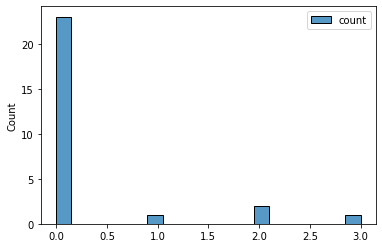

In [11]:
sns.histplot(data=ex_df_freq, bins=20)

In [12]:
np.random(10)

TypeError: 'module' object is not callable

In [ ]:
# Do this (new version)
from numpy.random import default_rng
rng = default_rng()
vals = rng.standard_normal(10)
more_vals = rng.standard_normal(10)

# instead of this (legacy version)
from numpy import random
vals = random.standard_normal(10)
more_vals = random.standard_normal(10)

In [ ]:
rng = default_rng(12345)
print(rng.random())

In [ ]:
x = random.randint(100)

print(x)